In [1]:
import numpy as np
import matplotlib.pyplot as plt
from files_sorting import Txt_Reading
import pandas as pd
import os

%matplotlib inline

In [2]:
folder = "1nM"
f_MAX = [10, 15, 20, 25, 30, 35]
f_max = f_MAX[0]
reading = Txt_Reading(folder, f_max)

The break point λ_0 [0.9035115677775848] could be smaller/higher than expected
or the rupture force [9.6903] smaller/higher than expected


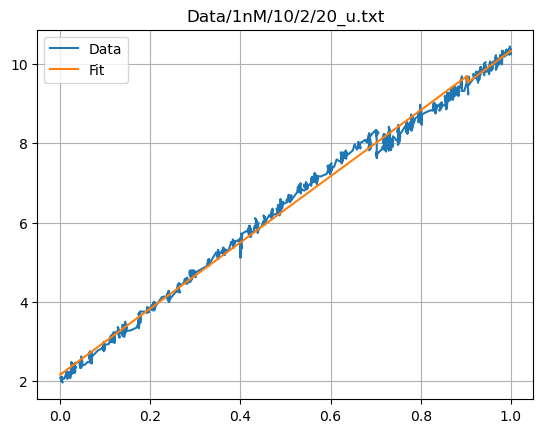

In [3]:
file = reading.readTxt(number=2, N=20, ty='u', graph=True)

In [4]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post
0,9.6903,9.2324,10.630467,26.270569,1.63626,0.903512,8.346108,2.160125,8.339916,1.995421


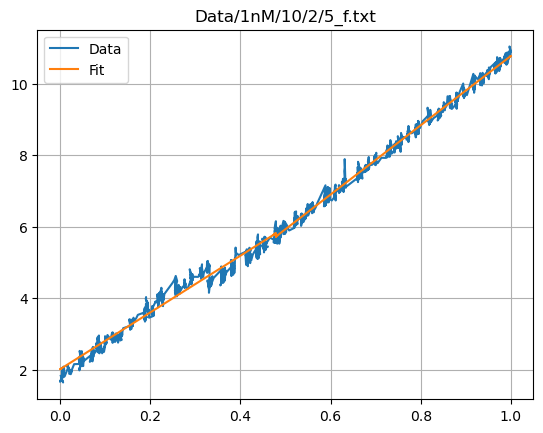

In [5]:
file = reading.readTxt(number=2, N=5, ty='f', graph=True)

In [6]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post
0,6.1563,5.5988,14.568402,41.045898,0.86096,0.478728,7.939249,2.016407,9.693606,1.087091


In [7]:
# plt.plot(reading.λ[:600], reading.force_Y[:600])
# plt.scatter(reading.λ_0, reading.f_rupture, marker="^", c="red")
# plt.scatter(reading.λ[(reading.index+1)[0]], reading.f_rupture_next, marker="v", c="orange", s=1000);

In [8]:
reading.f_rupture, reading.f_rupture_next

([6.1563], [5.5988])

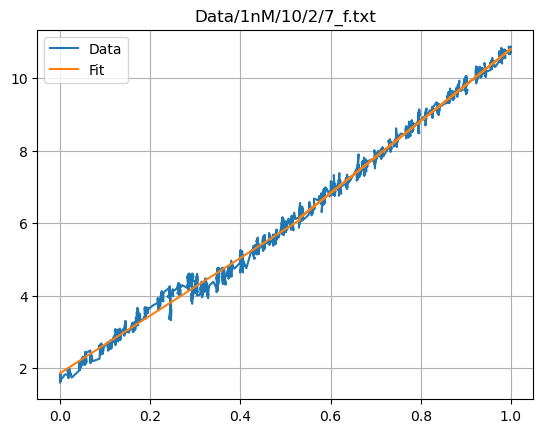

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post
0,6.3454,5.8742,12.691406,35.389923,0.95329,0.531167,7.94758,1.862201,9.942512,0.863831


In [9]:
file = reading.readTxt(number=2, N=7, ty='f', graph=True)
reading.params_df

In [10]:
# Columns: CycleCount, X_force,	Y_force, Z_force, time(sec), Status, λ

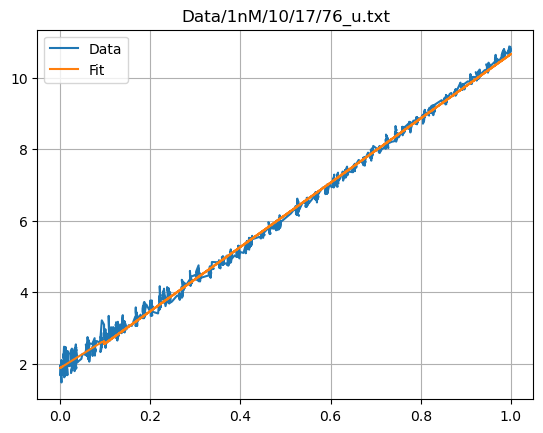

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post
0,3.0912,2.5935,12.765171,49.213196,0.26953,0.097681,7.855295,1.876733,8.991343,1.666779


In [11]:
file = reading.readTxt(number=17, N=76, ty='u', graph=True)
reading.params_df

In [12]:
molecules, all_molecules_f, all_molecules_u = reading.sequential_analysis()

  0%|          | 0/7 [00:00<?, ?it/s]

Not saving file Data/1nM/10/2/17_f.txt
Not saving file Data/1nM/10/2/24_f.txt
Not saving file Data/1nM/10/2/1_u.txt
Not saving file Data/1nM/10/2/20_u.txt
Not saving file Data/1nM/10/2/21_u.txt
Not saving file Data/1nM/10/2/23_u.txt
Not saving file Data/1nM/10/3/6_f.txt
Not saving file Data/1nM/10/3/11_f.txt
Not saving file Data/1nM/10/3/16_f.txt
Not saving file Data/1nM/10/3/17_f.txt
Not saving file Data/1nM/10/3/20_f.txt
Not saving file Data/1nM/10/3/32_f.txt
Not saving file Data/1nM/10/3/33_f.txt
Not saving file Data/1nM/10/3/34_f.txt
Not saving file Data/1nM/10/3/35_f.txt
Not saving file Data/1nM/10/3/36_f.txt
Not saving file Data/1nM/10/3/37_f.txt
Not saving file Data/1nM/10/3/6_u.txt
Not saving file Data/1nM/10/3/7_u.txt
Not saving file Data/1nM/10/3/12_u.txt
Not saving file Data/1nM/10/3/13_u.txt
Not saving file Data/1nM/10/3/20_u.txt
Not saving file Data/1nM/10/3/32_u.txt
Not saving file Data/1nM/10/3/33_u.txt
Not saving file Data/1nM/10/3/34_u.txt
Not saving file Data/1nM/10/3

In [13]:
reading.f_rupture

[4.8732]

In [14]:
reading.path, reading.index

('Data/1nM/10/17/93_u.txt', array([1006], dtype=int64))

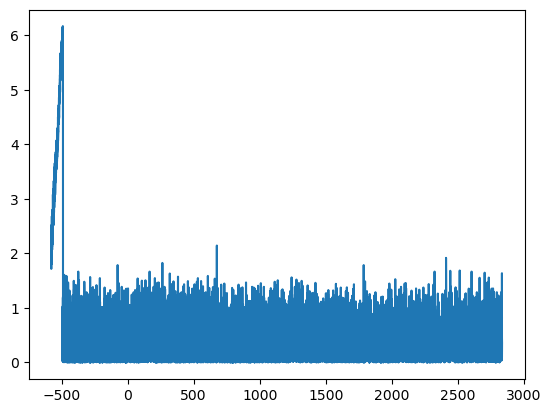

In [15]:
λ = reading.file[1:, -1]
force_Y = np.abs(reading.file[1:, 2])
plt.plot(λ, force_Y);

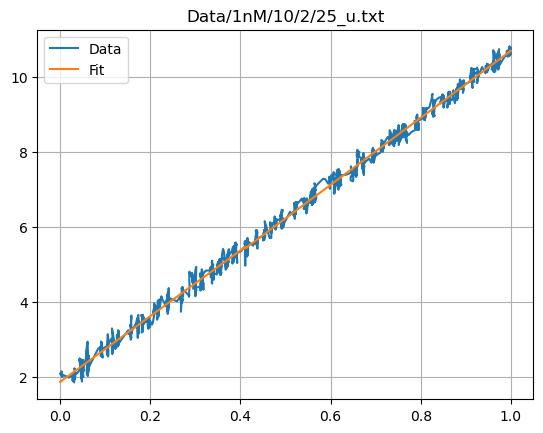

In [16]:
file = reading.readTxt(number=2, N=25, ty='u', graph=True)

In [17]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post
0,5.5291,4.9717,12.480253,36.554179,0.80524,0.41129,8.751938,1.874469,8.933299,1.761061


In [18]:
reading.k_eff

0.0497452190103372

In [19]:
# f_max = f_MAX[4]
# colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
#             "#e3b505","#95190c","#610345","#107e7d","#044b7f"]
# markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x"]

# for m in range(len(molecules)):
#     col = colors[m]
#     for i in range(len(all_molecules_f[m])):
#         lab = f'Molecule {m}' if i == 0 else ''
#         f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
#         plt.scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
# plt.grid()
# plt.legend(loc='best')
# plt.title(f'f_MAX = {f_max} -- Fold')
# # plt.xscale('log')
# plt.xlabel('Time [s]')
# plt.ylabel('$f_{rupture} \\:[pN]$')
# plt.show()

In [20]:
# Create folder for images
images_path = f'imgs/{folder}/{f_max}'
isExist = os.path.exists(images_path)
if not isExist:
    os.makedirs(images_path)
    print("The images directory is created...")

The images directory is created...


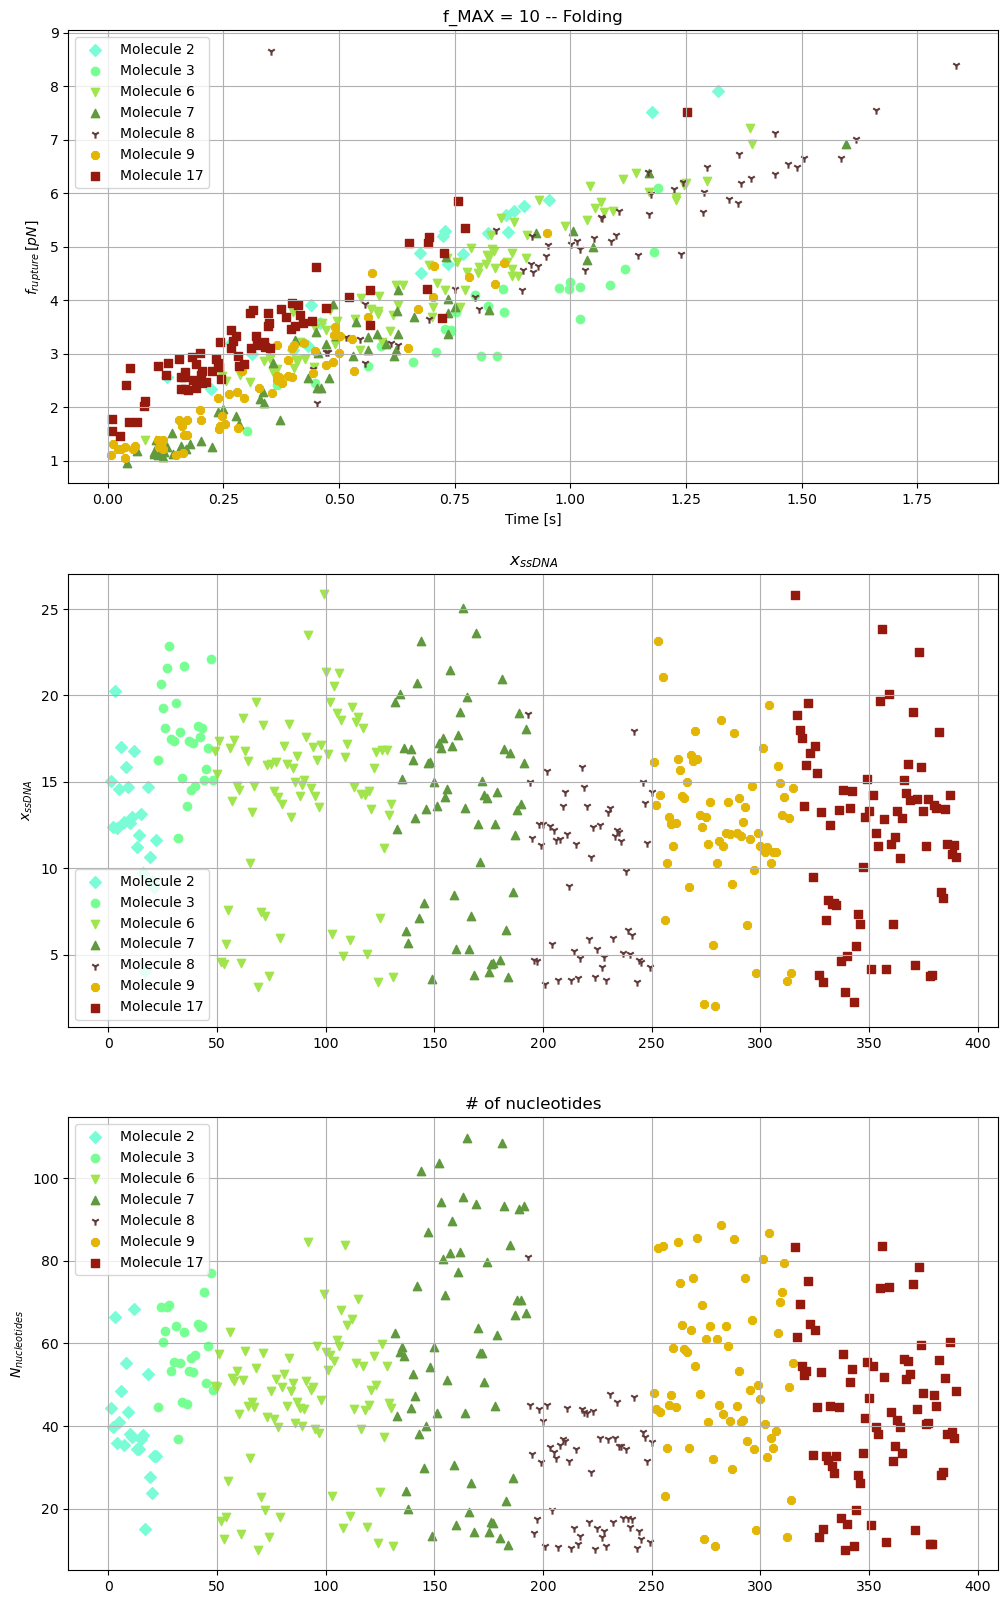

In [21]:
colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
           "d", "|", "_", "4", "P"]

fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_f[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Folding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# for m in range(len(molecules)):
#     col = colors[m]
#     for i in range(len(all_molecules_u[m])):
#         lab = f'Molecule {molecules[m]}' if i == 0 else ''
#         f, f_next, x_ss_DNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
#         plt.scatter(t_0, f, c=col, marker=markers[m], label=lab)
#     plt.grid()
#     plt.legend(loc='best')
#     plt.title(f'f_MAX = {f_max} -- Unfolding')
#     plt.xlabel('Time [s]')
#     plt.ylabel('$f_{rupture} \\:[pN]$')
#     plt.show()

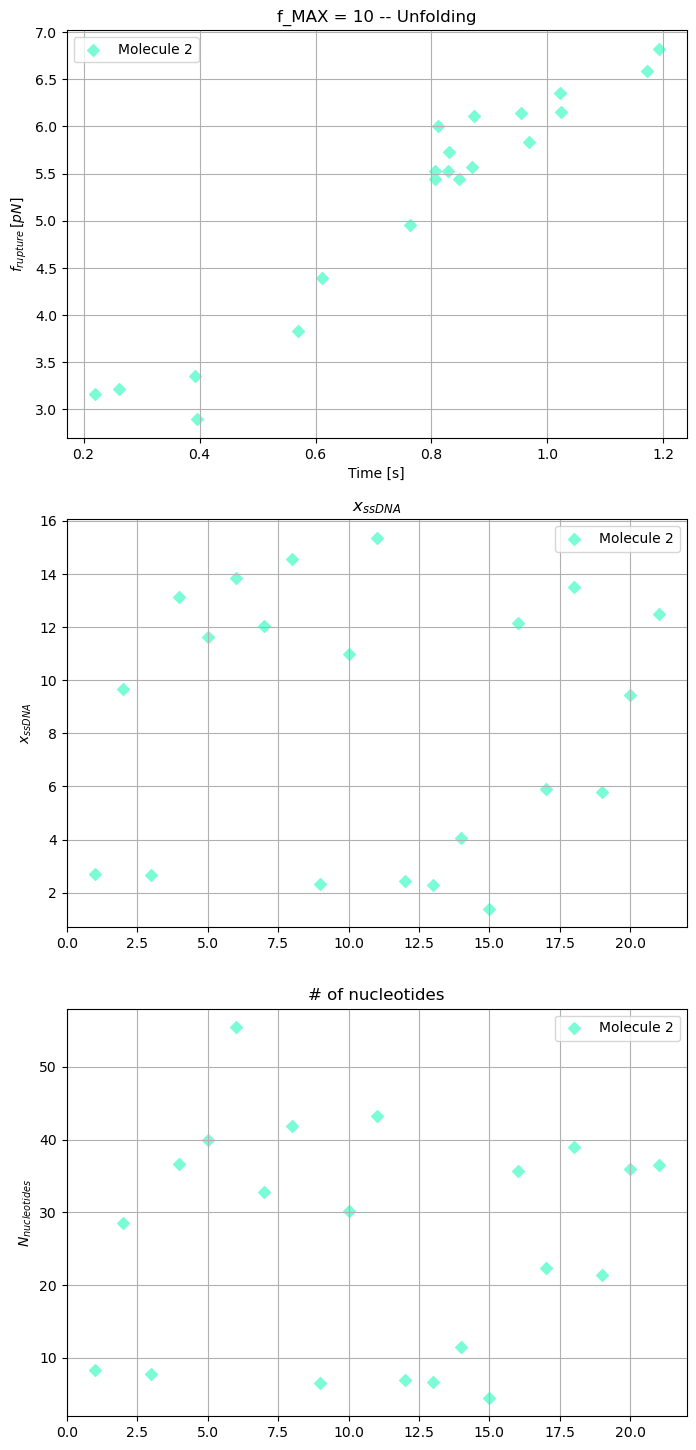

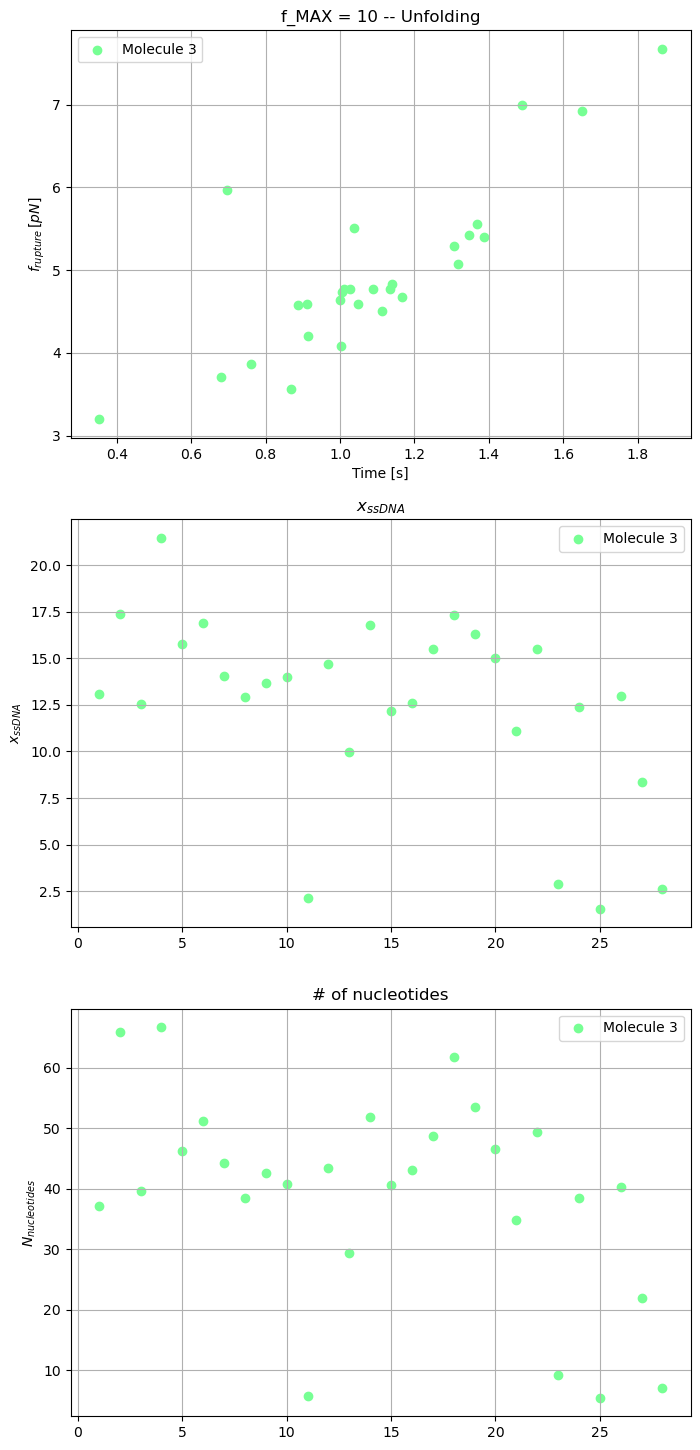

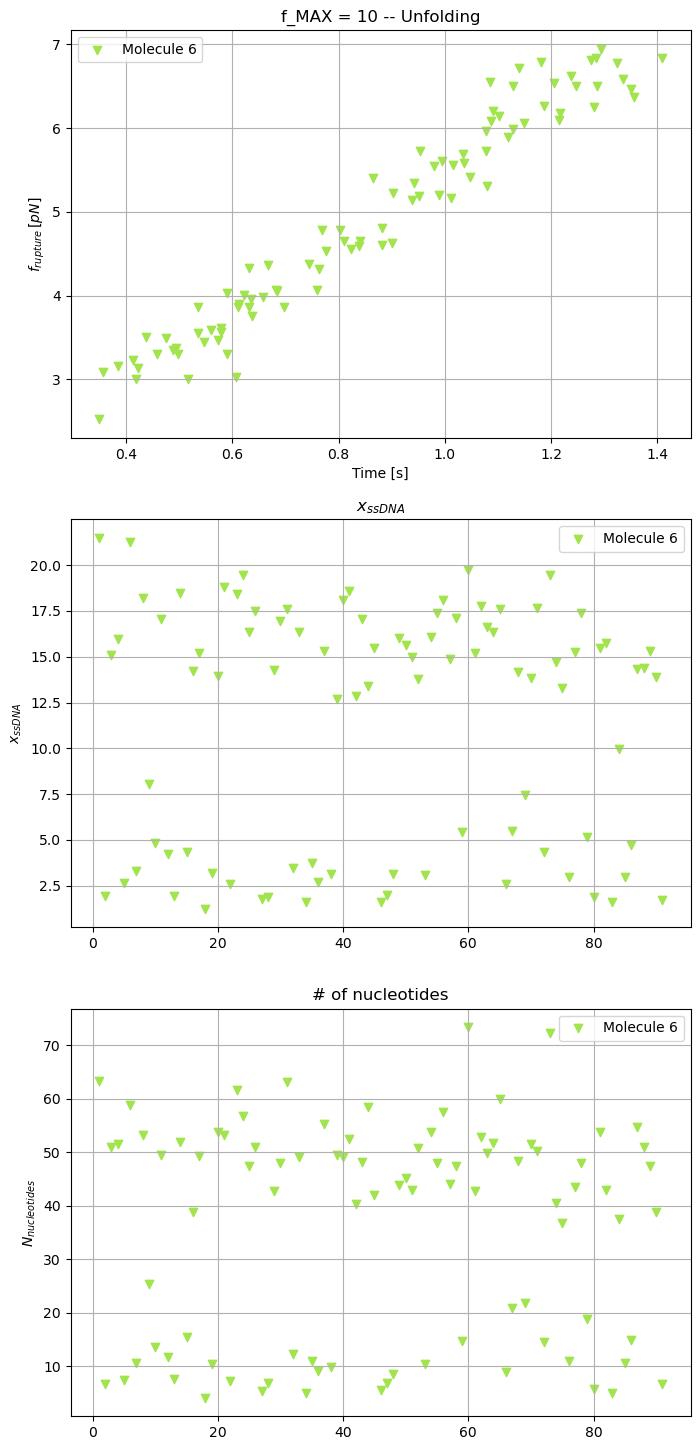

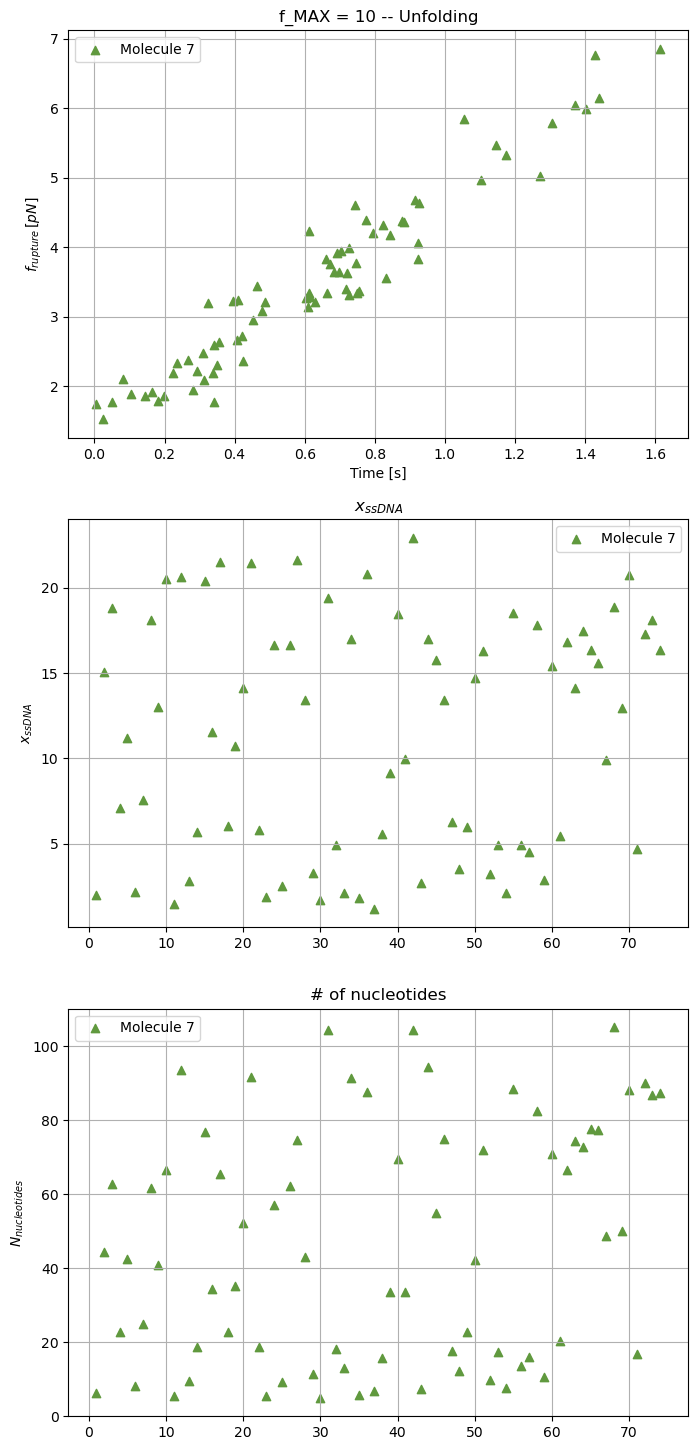

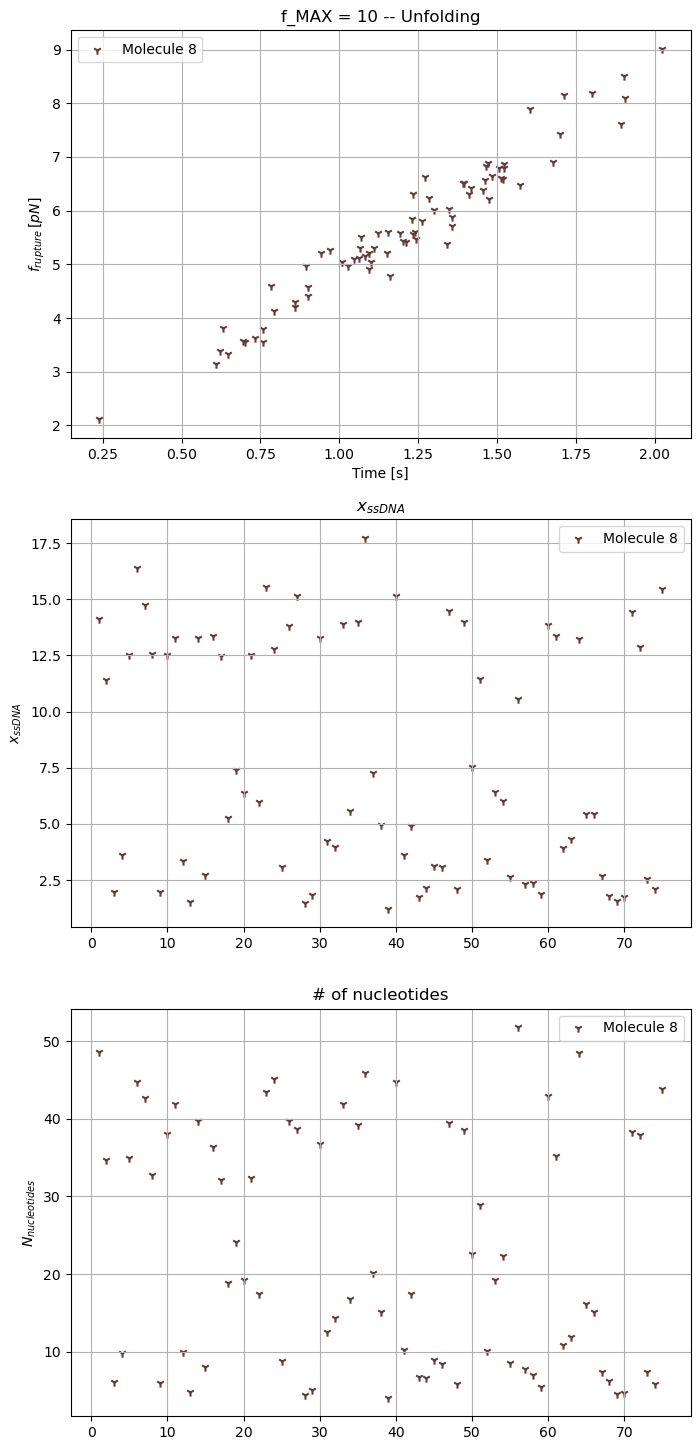

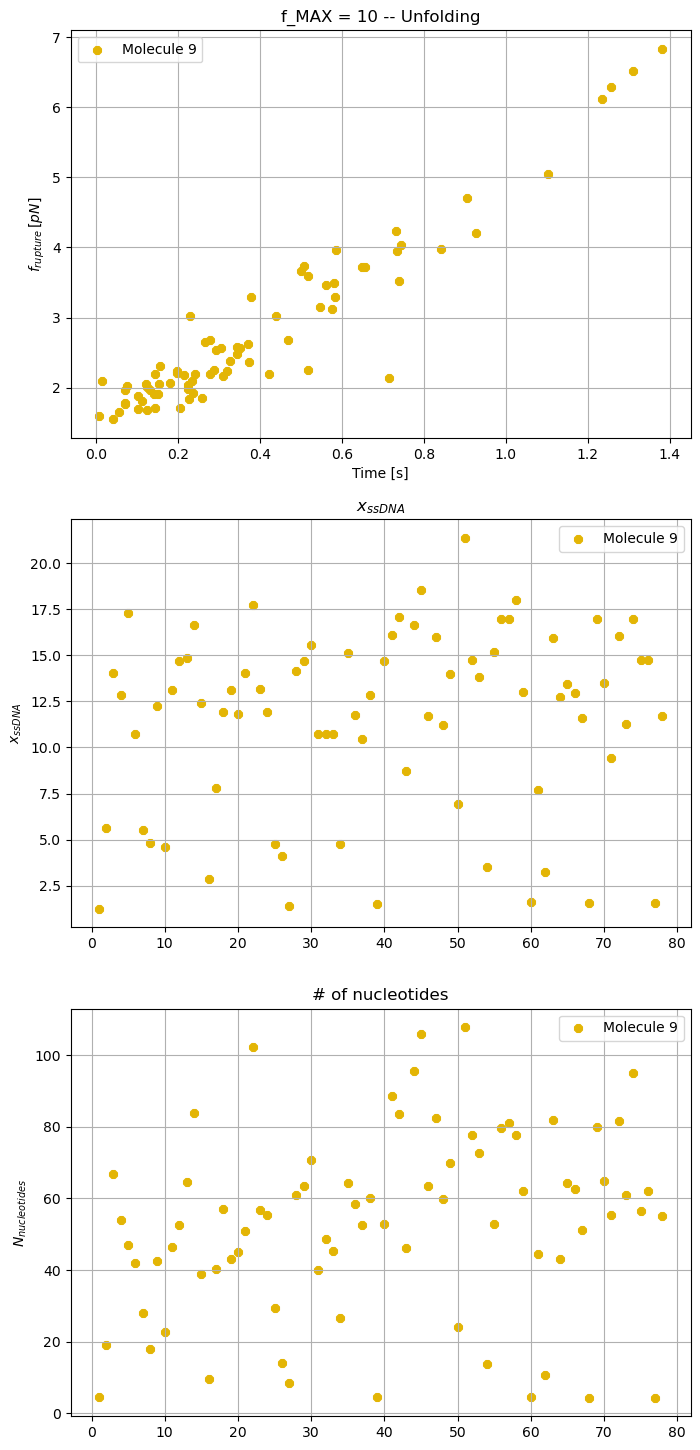

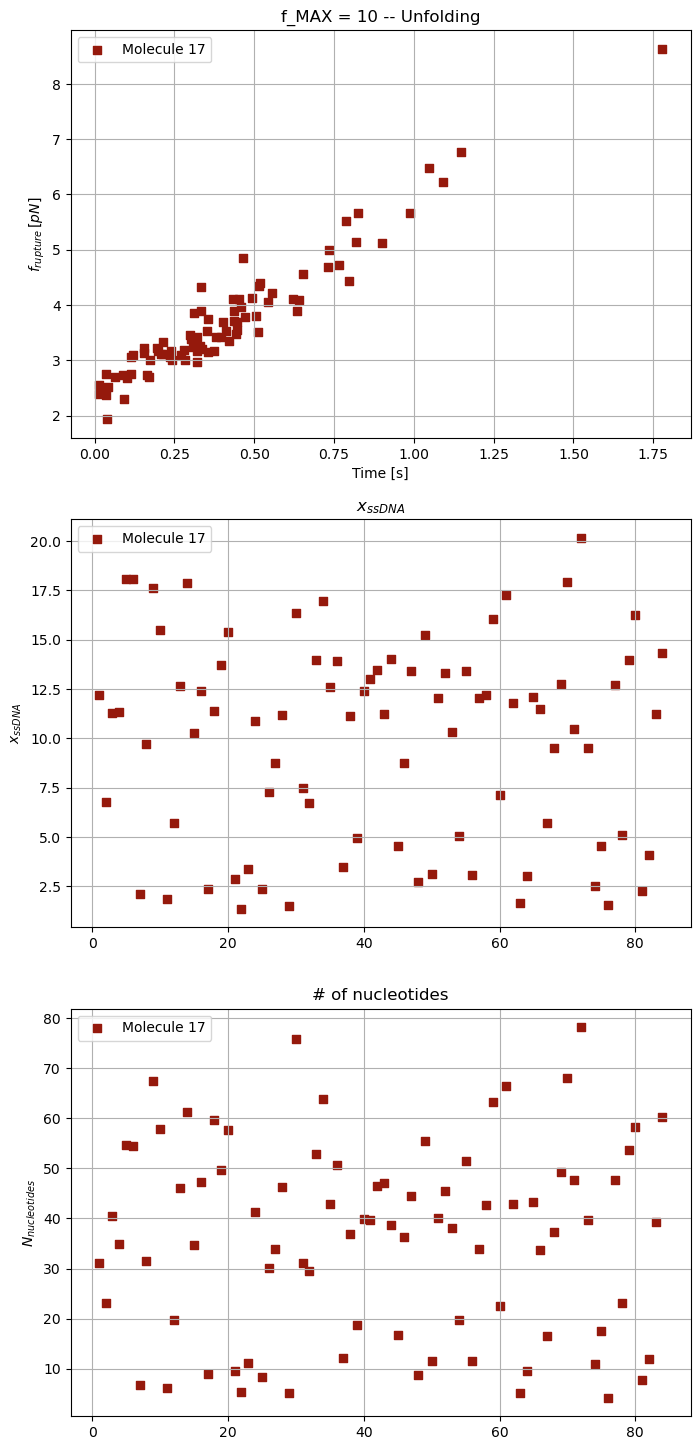

In [23]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_u[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unolding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()